# MARINE TRANSACTION PROJECT

## DF-VENDOR DATAFRAME

### LOAD DATA FROM SQL SERVER

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

conn_str = (
    "mssql+pyodbc://DESKTOP-J366DLJ\\SQLSERVER/LeS_SalesOrder?driver=ODBC+Driver+17+for+SQL+Server"
)

engine = create_engine(conn_str)

query_vendor = "SELECT * FROM SM_QUOTATIONS_VENDOR"
query_detail = "SELECT * FROM SM_QUOTATIONDETAIL_VENDOR"

##### SPECIFY THE TABLES

In [2]:
df_vendor = pd.read_sql(query_vendor, engine)
df_detail = pd.read_sql(query_detail, engine)
pd.set_option('display.max_columns', None)

In [3]:
df_vendor.head()

,QUOTATIONID,DOC_XML,DOCID,DOC_TYPE,VRNO,BUYER_VRNO,SUPPLIER_VRNO,QUOTE_ADDRESSID,BUYER_ADDRESSID,RFQ_SENT_DATE,QUOTE_RECVD_DATE,CURRENCYID,CURR_CODE,QUOTE_AMOUNT,QUOTE_EXCHRATE,ITEM_TOTAL,OTHERCOSTS,FREIGHTAMT,PAYMENT_TERMS,QUOTE_DISCOUNT,ADDITIONAL_DISC,ADD_DISC_TYPE,QUOTE_VALIDITY,QUOTE_REMARKS,UPDATE_DATE,DELIVERYTIME,PAYLOADID,CREATED_DATE,SITEID,SENT_BY,PORT_CODE,PORT_NAME,QUOTE_APPROVEDDATE,DELIVERYDAYS,QUOTE_SUBMIT_BY,QUOTE_REFERENCE,REPLY_BY_DATE,QUOTE_SUBMIT_DATE,VENDOR_STATUS,CHANGED_BY_VENDOR,LATEDATE,RFQ_ACK_DATE,PO_ACK_DATE,POC_REFERENCE,PODATE,POC_DATE,POC_BY,BUYER_REMARKS,VESSEL_NAME,VESSEL_IDNO,VESSEL_OWNER,VESSEL_OWNER_CODE,EXPORTED,VERSION,RFQ_EXPORT,QUOTE_FILE_REF,PRINT_STATUS,QUOTE_FILE_STAMP,DELIVERY_PROMISED,GENERAL_TERMS,PAY_TERMS,TAX_PERCNT,QUOTE_VERSION,IS_DECLINED,QUOTE_SUBJECT,SP_MAS_REMARK,BYR_SUPP_LINKID,ATTACHMENT1,ATTACHMENT2,ALLOWANCE,UDF1,UDF2,UDF3,RevisionNumber,LINK_RECORDID,TRANSPORT_MODE,OrderHandling,OrderType,OriginatingRequestNo,ShipComplete,SupplierORGRef,UpdType,ContractType,OrgSystemRef,OTHER_COST2,OTHER_COST3,VESSEL_ETA,VESSEL_ETD,LOCATION,ATTENTION_REMARK,BUYER_LINK_CODE,VENDOR_LINK_CODE,BUYER_SENDER,BUYER_RECIPIENT,EXPORTED_DATE,DEPARTMENT,TAX_AMOUNT,COST_AMOUNT1,COST_AMOUNT2
0,10248668,MTML,61FD838F-B8CD-44AD-9E5E-D4A30D10B080,RequestForQuote,D0406-ADX/001566466V1,D0406,D0406/1566466V1,4001051.0,1110018.0,None,NaT,NaN,None,0.0,NaN,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2015-07-10 13:07:01.887,NaT,None,NaT,None,None,None,None,None,NaN,NaN,None,NaT,NaT,8,None,NaT,NaT,NaT,None,NaT,NaT,NaN,This Request For Quotation is sent for and on ...,YUTAI BREEZE,9541631,Wallem Shipmanagement HK Limited,SM0018,0.0,1,0.0,None,0.0,None,NaT,None,None,NaN,NaN,0,None,None,100338.0,None,None,NaN,None,None,None,None,10248677.0,None,None,None,None,None,None,None,None,None,NaN,NaN,2021-09-21 02:40:30,2021-09-22,None,None,None,None,None,None,NaT,None,NaN,None,None
1,11434115,MTML,7E029258-1430-4662-B295-474F36EA93D6,RequestForQuote,SPR/DKON/D/18/085,SPR/DKON/D/18/085,None,4001020.0,5001551.0,None,2018-12-31 00:48:22.140,NaN,None,0.0,NaN,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2018-12-31 00:53:11.667,NaT,None,2018-12-31 00:48:22.140,None,None,nil,None,None,NaN,NaN,None,NaT,NaT,1,None,NaT,NaT,NaT,None,NaT,NaT,NaN,None,DKON - D AND K I,None,SYNERGY MARITIME PVT LTD,SM0637,0.0,1,0.0,181231_003626478.msg,0.0,None,NaT,None,None,NaN,NaN,0,DD REQUIREMENTS- BALLAST VENT HEADS WITH CLASS...,None,104203.0,None,None,NaN,None,None,None,None,0.0,None,None,None,None,None,None,None,None,None,0.0,0.0,NaT,NaT,None,None,None,None,None,None,NaT,None,NaN,None,None
2,11434116,MTML,CBAA9477-E233-469E-AE9A-D63D6D16BCEB,RequestForQuote,4394-00782,4394-00782,None,5000264.0,2000105.0,None,2018-12-31 01:03:22.120,10000002.0,EUR,0.0,1.4177,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2018-12-31 16:11:06.787,NaT,None,2018-12-31 01:03:22.120,None,None,None,None,None,NaN,NaN,None,NaT,NaT,8,None,NaT,NaT,NaT,None,NaT,NaT,NaN,"Expected Port of Delivery: Amsterdam - NLD,NLAMS",BW CLYDE,9269245,V.Ships Asia Group Pte Ltd,SM0036,0.0,1,0.0,None,0.0,None,NaT,"V.Ships Asia Group Pte Ltd, As Managers and Ag...",None,NaN,NaN,0,URGENT FIRE HOSES,None,103438.0,None,None,NaN,None,None,None,None,11434504.0,None,None,None,None,None,None,None,None,None,0.0,0.0,NaT,NaT,None,None,None,None,None,None,NaT,None,NaN,None,None
3,11434117,MTML,06D6642F-B1B9-4A3D-A10A-1A6092260A54,RequestForQuote,4394-00784,4394-00784,None,5000264.0,2000105.0,None,2018-12-31 01:03:24.643,10000002.0,EUR,0.0,1.4177,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2019-01-02 19:23:26.720,NaT,None,2018-12-31 01:03:24.643,None,None,None,None,None,NaN,NaN,None,NaT,NaT,8,None,NaT,NaT,NaT,None,NaT,NaT,NaN,"Expected Port of Delivery: Amsterdam - NLD,NLA...",BW CLYDE,9269245,V.Ships Asia Group Pte Ltd,SM0036,0.0,1,0.0,None,0.0,None,NaT,"V.Ships Asia Group Pte Ltd, As Managers and Ag...",None,NaN,NaN,0,SERVICING OF GAS INSTRUMENT RX-517,None,103438.0,None,None,NaN,None,None,None,None,11436110.0,None,None,N

In [4]:
df_vendor.shape

(443705, 99)

### DATA CLEANING: HANDLING NA VALUES

In [5]:
nan_columns = df_vendor.columns[df_vendor.isna().all()].tolist()      # list of all columns having null values
nan_columns

['RFQ_SENT_DATE',
 'PAYMENT_TERMS',
 'ADD_DISC_TYPE',
 'PAYLOADID',
 'SITEID',
 'SENT_BY',
 'QUOTE_APPROVEDDATE',
 'CHANGED_BY_VENDOR',
 'SP_MAS_REMARK',
 'ShipComplete',
 'UpdType',
 'ContractType',
 'BUYER_LINK_CODE',
 'VENDOR_LINK_CODE',
 'BUYER_RECIPIENT',
 'DEPARTMENT',
 'COST_AMOUNT1',
 'COST_AMOUNT2']

In [6]:
drop_1 = ['RFQ_SENT_DATE','PAYMENT_TERMS','ADD_DISC_TYPE','PAYLOADID','SITEID','SENT_BY','QUOTE_APPROVEDDATE','CHANGED_BY_VENDOR','SP_MAS_REMARK','ShipComplete',
          'UpdType','ContractType', 'BUYER_LINK_CODE', 'VENDOR_LINK_CODE', 'BUYER_RECIPIENT', 'DEPARTMENT','COST_AMOUNT1', 'COST_AMOUNT2', 'DOCID', 'CURRENCYID',
          'QUOTE_REMARKS', 'QUOTE_SUBMIT_BY', 'QUOTE_REFERENCE', 'BUYER_REMARKS', 'VESSEL_IDNO', 'VESSEL_OWNER_CODE', 'QUOTE_FILE_REF', 'PRINT_STATUS',
          'QUOTE_FILE_STAMP', 'DELIVERY_PROMISED', 'GENERAL_TERMS', 'PAY_TERMS', 'TAX_PERCNT', 'QUOTE_VERSION', 'ATTACHMENT1', 'ATTACHMENT2', 'ALLOWANCE', 'UDF1',
          'UDF2', 'UDF3', 'RevisionNumber', 'LINK_RECORDID', 'ATTENTION_REMARK', 'VESSEL_ETD', 'VESSEL_ETA', 'OrgSystemRef', 'SupplierORGRef', 'OriginatingRequestNo']
df_vendor = df_vendor.drop(columns=drop_1, axis='columns')

In [7]:
null_counts = df_vendor.isnull().sum()
print(null_counts)

QUOTATIONID               0
DOC_XML                   0
DOC_TYPE                  0
VRNO                      2
BUYER_VRNO            11121
SUPPLIER_VRNO        394242
QUOTE_ADDRESSID           6
BUYER_ADDRESSID           6
QUOTE_RECVD_DATE          1
CURR_CODE            110579
QUOTE_AMOUNT             18
QUOTE_EXCHRATE       174568
ITEM_TOTAL               18
OTHERCOSTS                0
FREIGHTAMT                0
QUOTE_DISCOUNT            0
ADDITIONAL_DISC      230297
QUOTE_VALIDITY       360497
UPDATE_DATE               0
DELIVERYTIME         311791
CREATED_DATE              1
PORT_CODE            237180
PORT_NAME            270519
DELIVERYDAYS         200391
REPLY_BY_DATE        429066
QUOTE_SUBMIT_DATE    302211
VENDOR_STATUS             0
LATEDATE             266258
RFQ_ACK_DATE         239453
PO_ACK_DATE          375741
POC_REFERENCE        408564
PODATE               340284
POC_DATE             408493
POC_BY               437278
VESSEL_NAME           17754
VESSEL_OWNER        

In [8]:
drop_2 = ['SUPPLIER_VRNO', 'QUOTE_VALIDITY', 'DELIVERYTIME', 'REPLY_BY_DATE', 'QUOTE_SUBMIT_DATE', 'PO_ACK_DATE', 'POC_REFERENCE', 'PODATE',
          'POC_DATE', 'POC_BY', 'TRANSPORT_MODE', 'OrderHandling', 'OrderType', 'LOCATION', 'BUYER_SENDER', 'EXPORTED_DATE', 'TAX_AMOUNT']
df_vendor = df_vendor.drop(columns=drop_2, axis='columns')
df_vendor.head()

,QUOTATIONID,DOC_XML,DOC_TYPE,VRNO,BUYER_VRNO,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_AMOUNT,QUOTE_EXCHRATE,ITEM_TOTAL,OTHERCOSTS,FREIGHTAMT,QUOTE_DISCOUNT,ADDITIONAL_DISC,UPDATE_DATE,CREATED_DATE,PORT_CODE,PORT_NAME,DELIVERYDAYS,VENDOR_STATUS,LATEDATE,RFQ_ACK_DATE,VESSEL_NAME,VESSEL_OWNER,EXPORTED,VERSION,RFQ_EXPORT,IS_DECLINED,QUOTE_SUBJECT,BYR_SUPP_LINKID,OTHER_COST2,OTHER_COST3
0,10248668,MTML,RequestForQuote,D0406-ADX/001566466V1,D0406,4001051.0,1110018.0,NaT,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2015-07-10 13:07:01.887,NaT,None,None,NaN,8,NaT,NaT,YUTAI BREEZE,Wallem Shipmanagement HK Limited,0.0,1,0.0,0,None,100338.0,NaN,NaN
1,11434115,MTML,RequestForQuote,SPR/DKON/D/18/085,SPR/DKON/D/18/085,4001020.0,5001551.0,2018-12-31 00:48:22.140,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2018-12-31 00:53:11.667,2018-12-31 00:48:22.140,nil,None,NaN,1,NaT,NaT,DKON - D AND K I,SYNERGY MARITIME PVT LTD,0.0,1,0.0,0,DD REQUIREMENTS- BALLAST VENT HEADS WITH CLASS...,104203.0,0.0,0.0
2,11434116,MTML,RequestForQuote,4394-00782,4394-00782,5000264.0,2000105.0,2018-12-31 01:03:22.120,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,2018-12-31 16:11:06.787,2018-12-31 01:03:22.120,None,None,NaN,8,NaT,NaT,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,URGENT FIRE HOSES,103438.0,0.0,0.0
3,11434117,MTML,RequestForQuote,4394-00784,4394-00784,5000264.0,2000105.0,2018-12-31 01:03:24.643,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,2019-01-02 19:23:26.720,2018-12-31 01:03:24.643,None,None,NaN,8,NaT,NaT,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,SERVICING OF GAS INSTRUMENT RX-517,103438.0,0.0,0.0
4,11434118,MTML,RequestForQuote,4394-00783,4394-00783,4001051.0,2000105.0,2018-12-31 01:03:27.133,USD,0.0,1.0000,0.0,0.0,0.0,0.0,NaN,2018-12-31 01:13:30.337,2018-12-31 01:03:27.133,NLRTM,Rotterdam,NaN,2,NaT,2018-12-31 01:13:35.493,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,URGENT SPAN GAS & OTHERS,102029.0,0.0,0.0


In [9]:
zero_columns = df_vendor.columns[(df_vendor.eq(0) | df_vendor.eq(0.0)).any()].tolist()
sum_of_zeros = df_vendor[zero_columns].eq(0) | df_vendor[zero_columns].eq(0.0)
sum_of_zeros_count = sum_of_zeros.sum()
print(sum_of_zeros_count)

QUOTE_AMOUNT       220840
ITEM_TOTAL         276283
OTHERCOSTS         438197
FREIGHTAMT         432495
QUOTE_DISCOUNT     443705
ADDITIONAL_DISC    212748
DELIVERYDAYS       138903
EXPORTED           443396
RFQ_EXPORT         399487
IS_DECLINED        438718
OTHER_COST2        441564
OTHER_COST3        438589
dtype: int64


In [10]:
drop_3 = ['OTHERCOSTS', 'FREIGHTAMT', 'QUOTE_DISCOUNT', 'QUOTE_AMOUNT', 'ADDITIONAL_DISC', 'OTHER_COST3', 'OTHER_COST2', 'IS_DECLINED', 'RFQ_EXPORT',
          'EXPORTED']
df_vendor = df_vendor.drop(columns=drop_3, axis='columns')

In [11]:
drop_4 = ['DOC_XML', 'BUYER_VRNO', 'BYR_SUPP_LINKID','VERSION','LATEDATE','PORT_NAME','VESSEL_NAME','VENDOR_STATUS','DELIVERYDAYS','PORT_CODE',
          'ITEM_TOTAL','VRNO','UPDATE_DATE','RFQ_ACK_DATE','QUOTE_SUBJECT']
df_vendor = df_vendor.drop(columns=drop_4, axis='columns')
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,CREATED_DATE,VESSEL_OWNER
0,10248668,RequestForQuote,4001051.0,1110018.0,NaT,None,NaN,NaT,Wallem Shipmanagement HK Limited
1,11434115,RequestForQuote,4001020.0,5001551.0,2018-12-31 00:48:22.140,None,NaN,2018-12-31 00:48:22.140,SYNERGY MARITIME PVT LTD
2,11434116,RequestForQuote,5000264.0,2000105.0,2018-12-31 01:03:22.120,EUR,1.4177,2018-12-31 01:03:22.120,V.Ships Asia Group Pte Ltd
3,11434117,RequestForQuote,5000264.0,2000105.0,2018-12-31 01:03:24.643,EUR,1.4177,2018-12-31 01:03:24.643,V.Ships Asia Group Pte Ltd
4,11434118,RequestForQuote,4001051.0,2000105.0,2018-12-31 01:03:27.133,USD,1.0000,2018-12-31 01:03:27.133,V.Ships Asia Group Pte Ltd


In [12]:
df_vendor.dtypes

QUOTATIONID                  int64
DOC_TYPE                    object
QUOTE_ADDRESSID            float64
BUYER_ADDRESSID            float64
QUOTE_RECVD_DATE    datetime64[ns]
CURR_CODE                   object
QUOTE_EXCHRATE             float64
CREATED_DATE        datetime64[ns]
VESSEL_OWNER                object
dtype: object

In [13]:
df_vendor[['QUOTE_ADDRESSID', 'BUYER_ADDRESSID']] = df_vendor[['QUOTE_ADDRESSID', 'BUYER_ADDRESSID']].fillna(-1).astype(np.int64)

In [14]:
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,CREATED_DATE,VESSEL_OWNER
0,10248668,RequestForQuote,4001051,1110018,NaT,None,NaN,NaT,Wallem Shipmanagement HK Limited
1,11434115,RequestForQuote,4001020,5001551,2018-12-31 00:48:22.140,None,NaN,2018-12-31 00:48:22.140,SYNERGY MARITIME PVT LTD
2,11434116,RequestForQuote,5000264,2000105,2018-12-31 01:03:22.120,EUR,1.4177,2018-12-31 01:03:22.120,V.Ships Asia Group Pte Ltd
3,11434117,RequestForQuote,5000264,2000105,2018-12-31 01:03:24.643,EUR,1.4177,2018-12-31 01:03:24.643,V.Ships Asia Group Pte Ltd
4,11434118,RequestForQuote,4001051,2000105,2018-12-31 01:03:27.133,USD,1.0000,2018-12-31 01:03:27.133,V.Ships Asia Group Pte Ltd


#### DATE AND TIME FORMATTING

In [15]:
df_vendor['CREATED_DATE'] = df_vendor['CREATED_DATE'].replace('', np.nan)
df_vendor.dropna(subset=['CREATED_DATE'], inplace=True)

In [16]:
df_vendor['CREATE_DATE'] = df_vendor['CREATED_DATE'].dt.date
df_vendor.drop(columns=['CREATED_DATE'], inplace=True)
df_vendor['QUOTE_RECVD_DATE'] = df_vendor['QUOTE_RECVD_DATE'].dt.date

In [17]:
df_vendor['QUOTE_RECVD_DATE'] = pd.to_datetime(df_vendor['QUOTE_RECVD_DATE'], errors='coerce')
df_vendor['CREATE_DATE'] = pd.to_datetime(df_vendor['CREATE_DATE'], errors='coerce')
df_vendor = df_vendor.dropna(subset=['CREATE_DATE'])
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,CREATE_DATE
1,11434115,RequestForQuote,4001020,5001551,2018-12-31,None,NaN,SYNERGY MARITIME PVT LTD,2018-12-31
2,11434116,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31
3,11434117,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31
4,11434118,RequestForQuote,4001051,2000105,2018-12-31,USD,1.0000,V.Ships Asia Group Pte Ltd,2018-12-31
5,11434119,RequestForQuote,5000130,5000725,2018-12-31,EUR,1.4177,Stolt Tankers BV,2018-12-31


In [18]:
df_vendor['CURR_CODE'].value_counts()

CURR_CODE
USD    148163
EUR     80893
JPY     39991
SGD     34615
GBP      7174
        ...  
850         1
94          1
UR          1
88          1
39          1
Name: count, Length: 69, dtype: int64

In [19]:
df_vendor['CURR_CODE'] = df_vendor['CURR_CODE'].str.upper()
currency_corrections = {
    'US': 'USD',
    'US$': 'USD',
    'Eur': 'EUR',
    'CON': 'EUR',
    'EU': 'EUR',
    'SID': 'SGD',
}

df_vendor['CURR_CODE'] = df_vendor['CURR_CODE'].replace(currency_corrections)
valid_currencies = ['USD', 'EUR', 'JPY', 'SGD', 'GBP', 'CNY', 'AED', 'NOK', 'DKK', 
                    'AUD', 'BRL', 'NZD', 'ARS', 'KWD', 'CAD', 'INR', 'TRY', 'CLP', 
                    'TWD', 'KRW', 'HKD', 'SEK', 'TL', 'IRR', 'UGX', 'SAR', 'OMR', 
                    'MAD', 'PHP']

df_vendor['CURR_CODE'] = df_vendor['CURR_CODE'].where(df_vendor['CURR_CODE'].isin(valid_currencies), np.nan)

In [20]:
df_vendor.shape

(443704, 9)

In [21]:
df_vendor.describe()

,QUOTATIONID,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,QUOTE_EXCHRATE,CREATE_DATE
count,4.437040e+05,4.437040e+05,4.437040e+05,443704,269137.000000,443704
mean,1.165611e+07,4.905821e+06,4.469180e+06,2019-07-04 03:00:49.265276416,1.032636,2019-07-04 20:14:38.726358016
min,1.143412e+07,-1.000000e+00,-1.000000e+00,2018-07-06 00:00:00,0.013100,2018-12-31 00:00:00
25%,1.154508e+07,4.001047e+06,4.000101e+06,2019-04-01 00:00:00,1.000000,2019-04-02 00:00:00
50%,1.165609e+07,4.001051e+06,5.000725e+06,2019-07-08 00:00:00,1.000000,2019-07-09 00:00:00
75%,1.176711e+07,5.000264e+06,5.001501e+06,2019-10-05 00:00:00,1.417700,2019-10-07 00:00:00
max,1.188117e+07,1.500051e+07,1.500051e+07,2024-03-05 00:00:00,1.608100,2024-03-05 00:00:00
std,1.281987e+05,2.528537e+06,1.839227e+06,NaN,0.366456,NaN


In [22]:
median_exchrate = df_vendor['QUOTE_EXCHRATE'].median()
df_vendor['QUOTE_EXCHRATE'] = df_vendor['QUOTE_EXCHRATE'].fillna(median_exchrate)

In [23]:
df_vendor = df_vendor[(df_vendor['QUOTE_ADDRESSID'] >= 0) & (df_vendor['BUYER_ADDRESSID'] >= 0)]

In [24]:
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,CREATE_DATE
1,11434115,RequestForQuote,4001020,5001551,2018-12-31,NaN,1.0000,SYNERGY MARITIME PVT LTD,2018-12-31
2,11434116,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31
3,11434117,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31
4,11434118,RequestForQuote,4001051,2000105,2018-12-31,USD,1.0000,V.Ships Asia Group Pte Ltd,2018-12-31
5,11434119,RequestForQuote,5000130,5000725,2018-12-31,EUR,1.4177,Stolt Tankers BV,2018-12-31


### OUTLIER REMOVAL ( BUSINESS LOGIC )

## DF-DETAIL DATAFRAME

In [25]:
df_detail.head()

,QUOTATIONDETAILID,QUOTATIONID,ITEMSTATUS,ITEMNO,VENDOR_ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,QUOTE_EXCHRATE,DISCOUNT,DELIVERYTIME,PARTNAME,DRAWINGNO,POSNO,REFNO,UNIT_CODE,EQUIP_NAME,EQUIP_MAKER,EQUIP_TYPE,EQUIP_SERNO,EQUIP_REMARKS,QUOTEITEM_REMARK,ITEM_REMARK,UPDATE_DATE,CREATED_DATE,CHANGED_BY_VENDOR,SITEID,DOCITEMID,QUOTE_FILE,VENDOR_REFNO,ORIGINATINGSYSTEMREF,ITEM_MARKED_REMARK,SYS_ITEMNO,BUYER_UNIT_CODE,ITEM_TYPE,LINK_RECORD_ID,UDF1,UDF2,UDF3,SupplierORGRef,VENDOR_ITEMNAME,BuyerORGRef,REFERENCE_NO,ExternalItemNumber,IMPA,ISSA,ITEM_PACKET_SIZE,DEPARTMENT,TAX_AMOUNT,BYR_ORIGINATINGSYSTEMREF,Buyer_Price,EQUIP_MODEL,IsHazardous
0,23596588,11879966.0,1,1.0,1,3.0,3.0,0.0,1360.0,1.0,70.0,0.0,"CHEMICALS,NALFLEET,COOL WATER TEST KIT, PART N...",None,None,"M0248,WITH MSDS",PCS,None,None,None,None,None,None,Item Code WC4-0592,2021-08-20 15:10:02.220,2021-08-20 15:10:02.220,NaN,None,1E42D479-46CD-493D-B62B-10C6ABCB5DEF,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,777067,23596056,None,1.0,PCS,None,23596056.0,None,None,None,None,NITRITE FULL KIT MO248A,None,None,None,None,None,None,None,61.20,None,NaN,None,NaN
1,23596589,11879966.0,1,2.0,2,2.0,50.0,0.0,45.1,1.0,65.0,0.0,"CHEMICALS,UNITOR,DISCLEAN,PART NO.571687",None,None,571687,LTR,None,None,None,None,None,None,Item Code WC4-0959A,2021-08-20 15:10:02.250,2021-08-20 15:10:02.250,NaN,None,74D8CA56-F9C7-45C9-87C5-5670537696C0,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,571687,23596057,None,2.0,PAL,None,23596057.0,None,None,None,None,DISCLEAN 25 LTR,None,None,None,None,None,None,None,39.46,None,NaN,None,NaN
2,23596590,11879966.0,1,3.0,3,1.0,25.0,0.0,42.9,1.0,55.0,0.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",None,None,"571380,25 LITER PALE",LTR,None,None,None,None,None,None,Item Code XCON-05-0048,2021-08-20 15:10:02.280,2021-08-20 15:10:02.280,NaN,None,1220C08E-6EB0-47C4-9943-0F632A449565,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,765018,23596058,None,3.0,PCS,None,23596058.0,None,None,None,None,ENVIROCLEAN 25 LTR,None,None,None,None,None,None,None,24.13,None,NaN,None,NaN
3,23596591,11879966.0,1,4.0,4,4.0,100.0,0.0,42.9,1.0,55.0,0.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",None,None,"571380,25 LITER PALE",LTR,None,None,None,None,None,None,Item Code XCON-05-0048,2021-08-20 15:10:02.303,2021-08-20 15:10:02.303,NaN,None,080F4B01-9D3E-41CA-A2DA-37FEF6838FEB,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,765018,23596059,None,4.0,PCS,None,23596059.0,None,None,None,None,ENVIROCLEAN 25 LTR,None,None,None,None,None,None,None,96.53,None,NaN,None,NaN
4,23596592,11879966.0,1,5.0,5,1.0,1.0,0.0,235.0,1.0,42.0,0.0,"WILHELMSEN SHIP SERVICES, LIQUID HAND SOAP, EA...",None,None,"778853, PACKING SIZE: 12PCS CARTON X 250ML BOT...",PCS,None,None,None,None,None,None,Item Code XCHE-01-0047,2021-08-20 15:10:02.333,2021-08-20 15:10:02.333,NaN,None,977A669C-2F85-4751-9B83-8BC26C7B44E4,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,778853,23596060,None,5.0,CRT,None,23596060.0,None,None,None,None,EASYCLEAN LIQUID HAND SOAP(12 x 0.25ltr in box),None,None,None,None,None,None,None,6.82,None,NaN,None,NaN


In [26]:
df_detail.shape

(34199, 54)

### DATA CLEANING: HANDLING NA VALUES

In [27]:
df_detail.isnull().sum()

QUOTATIONDETAILID               0
QUOTATIONID                     1
ITEMSTATUS                      0
ITEMNO                          1
VENDOR_ITEMNO                5489
QTY_REQ                         0
QTY_QUOTED                      0
QTY_ORD                     25918
QUOTED_PRICE                   57
QUOTE_EXCHRATE              25917
DISCOUNT                     9234
DELIVERYTIME                 6202
PARTNAME                        2
DRAWINGNO                   34177
POSNO                       34199
REFNO                       27950
UNIT_CODE                     382
EQUIP_NAME                  33031
EQUIP_MAKER                 33520
EQUIP_TYPE                  33935
EQUIP_SERNO                 27019
EQUIP_REMARKS               27136
QUOTEITEM_REMARK            32675
ITEM_REMARK                 30940
UPDATE_DATE                 25923
CREATED_DATE                25923
CHANGED_BY_VENDOR            7938
SITEID                      34199
DOCITEMID                   25920
QUOTE_FILE    

In [28]:
drop1 = ['ITEMSTATUS','VENDOR_ITEMNO','QUOTE_EXCHRATE','DRAWINGNO','CREATED_DATE','POSNO','EQUIP_REMARKS','QUOTEITEM_REMARK','QUOTE_FILE','DELIVERYTIME','SYS_ITEMNO','CHANGED_BY_VENDOR',
         'REFNO','EQUIP_SERNO','EQUIP_NAME','EQUIP_TYPE','EQUIP_MAKER','ITEM_REMARK','UPDATE_DATE','DOCITEMID','SITEID','ORIGINATINGSYSTEMREF','ITEM_MARKED_REMARK',
         'ITEM_TYPE','UDF1','UDF2','UDF3','SupplierORGRef','VENDOR_ITEMNAME','BuyerORGRef','REFERENCE_NO','ExternalItemNumber','IMPA','ISSA','ITEM_PACKET_SIZE',
         'DEPARTMENT','TAX_AMOUNT','BYR_ORIGINATINGSYSTEMREF','Buyer_Price','EQUIP_MODEL','PARTNAME','UNIT_CODE','IsHazardous','LINK_RECORD_ID','VENDOR_REFNO','QUOTATIONDETAILID','BUYER_UNIT_CODE']
df_detail = df_detail.drop(columns=drop1)

In [29]:
df_detail['QUOTATIONID'] = df_detail['QUOTATIONID'].fillna(-1).astype(int)   #fill NaN -> -1 and convert to int type

In [30]:
df_detail['QUOTED_PRICE'] = pd.to_numeric(df_detail['QUOTED_PRICE'], errors='coerce')

In [31]:
df_detail.dropna(subset=['QUOTED_PRICE'], inplace=True)
df_detail.dropna(subset=['QTY_ORD'], inplace=True)

In [32]:
df_detail.shape

(8224, 7)

In [33]:
df_detail.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT
0,11879966,1.0,3.0,3.0,0.0,1360.0,70.0
1,11879966,2.0,2.0,50.0,0.0,45.1,65.0
2,11879966,3.0,1.0,25.0,0.0,42.9,55.0
3,11879966,4.0,4.0,100.0,0.0,42.9,55.0
4,11879966,5.0,1.0,1.0,0.0,235.0,42.0


In [34]:
df_detail.describe()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT
count,8.224000e+03,8223.000000,8224.000000,8224.000000,8224.000000,8224.000000,8130.000000
mean,1.187727e+07,42.324577,26.060977,27.199960,3.612411,367.851438,2.500656
std,1.366881e+05,46.167393,82.190486,82.590938,18.274580,7820.415122,10.947920
min,-1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.187973e+07,6.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.187987e+07,22.000000,6.000000,6.000000,0.000000,0.000000,0.000000
75%,1.188001e+07,66.500000,20.000000,20.000000,0.000000,0.000000,0.000000
max,1.188117e+07,220.000000,4000.000000,4000.000000,300.000000,278550.000000,79.470000


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

numerical_columns = ['QTY_REQ', 'QTY_QUOTED', 'QTY_ORD', 'QUOTED_PRICE', 'DISCOUNT']

def fill_qty_ord_ml(df):
    imputer = SimpleImputer(strategy='median')
    df['QTY_ORD'] = imputer.fit_transform(df[['QTY_ORD']])
    X = df[['QTY_REQ', 'QTY_QUOTED']] 
    y = df['QTY_ORD'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_pred = df.loc[df['QTY_ORD'] == 0, ['QTY_REQ', 'QTY_QUOTED']]
    y_pred = model.predict(X_pred)
    df.loc[df['QTY_ORD'] == 0, 'QTY_ORD'] = y_pred    
    return df

df_detail_cleaned = fill_qty_ord_ml(df_detail.copy())

In [36]:
df_detail_cleaned['QTY_ORD'] = np.where(df_detail_cleaned['QTY_ORD'] < 3, 0, df_detail_cleaned['QTY_ORD'])

In [37]:
def fill_quoted_price(df):
    avg_quoted_price_per_unit = df.loc[(df['QUOTED_PRICE'] > 0) & (df['QTY_ORD'] > 0), 'QUOTED_PRICE'].sum() / \
                                df.loc[(df['QUOTED_PRICE'] > 0) & (df['QTY_ORD'] > 0), 'QTY_ORD'].sum()

    mask = (df['QUOTED_PRICE'] == 0) & (df['QTY_ORD'] != 0)
    df.loc[mask, 'QUOTED_PRICE'] = df.loc[mask, 'QTY_ORD'] * avg_quoted_price_per_unit
    return df

df_detail_cleaned = fill_quoted_price(df_detail_cleaned)

In [38]:
df_detail_cleaned['QUOTED_PRICE'] = np.where(df_detail_cleaned['QUOTED_PRICE'] < 1, 0, df_detail_cleaned['QUOTED_PRICE'])

In [39]:
df_detail_cleaned.describe()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT
count,8.224000e+03,8223.000000,8224.000000,8224.000000,8224.000000,8224.000000,8130.000000
mean,1.187727e+07,42.324577,26.060977,27.199960,5.619734,370.896550,2.500656
std,1.366881e+05,46.167393,82.190486,82.590938,18.238346,7820.273880,10.947920
min,-1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.187973e+07,6.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.187987e+07,22.000000,6.000000,6.000000,3.086680,4.876785,0.000000
75%,1.188001e+07,66.500000,20.000000,20.000000,3.665290,7.109891,0.000000
max,1.188117e+07,220.000000,4000.000000,4000.000000,300.000000,278550.000000,79.470000


### MERGE DATAFRAME

#### MERGING TABLES : DF_VENDOR, DF_DETAIL_CLEANED

In [40]:
merge = pd.merge(df_detail_cleaned, df_vendor, on='QUOTATIONID', how='inner')

In [41]:
merge.shape

(8206, 15)

In [42]:
merge.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,CREATE_DATE
0,11879966,1.0,3.0,3.0,0.000000,1360.0,70.0,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19
1,11879966,2.0,2.0,50.0,3.073364,45.1,65.0,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19
2,11879966,3.0,1.0,25.0,0.000000,42.9,55.0,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19
3,11879966,4.0,4.0,100.0,3.349354,42.9,55.0,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19
4,11879966,5.0,1.0,1.0,0.000000,235.0,42.0,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19


### USING ONE HOT ENCODING FOR CATEGORICAL DATA

In [43]:
df1 = pd.get_dummies(merge, columns=['DOC_TYPE', 'CURR_CODE', 'VESSEL_OWNER'])

In [44]:
df1.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,QUOTE_EXCHRATE,CREATE_DATE,DOC_TYPE_Order,DOC_TYPE_OrderResponse,DOC_TYPE_POC,DOC_TYPE_Quotation,DOC_TYPE_Quote,DOC_TYPE_RequestForQuote,CURR_CODE_AED,CURR_CODE_BRL,CURR_CODE_DKK,CURR_CODE_EUR,CURR_CODE_GBP,CURR_CODE_JPY,CURR_CODE_NOK,CURR_CODE_SGD,CURR_CODE_USD,"VESSEL_OWNER_""K"" LINE LNG SHIPPING (UK) LTD.",VESSEL_OWNER_ARAB MARITIME PETROLEUM TRANSPORT CO. (AMPTC),VESSEL_OWNER_Anglo-Eastern Ship Management Ltd.,VESSEL_OWNER_Bergshav Management AS,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Hong Kong) Limite,VESSEL_OWNER_Bernhard Schulte Shipmanagement (India) Pvt. Limit,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Isle of Man) Ltd,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Singapore) Pte Lt,VESSEL_OWNER_Besiktas Marine,VESSEL_OWNER_CHELLARAM SHIPPING LTD,VESSEL_OWNER_CHESVA ENTERPRISES LTD,VESSEL_OWNER_CHIOS NAVIGATION (HELLAS) LTD,VESSEL_OWNER_CMA Ship France,VESSEL_OWNER_Carisbrooke Shipping Ltd,VESSEL_OWNER_Finaval SPA,VESSEL_OWNER_Fuji Trading Marine B.V,"VESSEL_OWNER_IINO MARINE SERVICES CO., LTD",VESSEL_OWNER_IONIC SHIPPING (MGT) INC.,VESSEL_OWNER_Lighthouse eSolutions Buyer,VESSEL_OWNER_M.T.M SHIP MANAGEMENT PTE. LTD,VESSEL_OWNER_MARLOW NAVIGATION CO LTD,VESSEL_OWNER_MESPAS Buyer,VESSEL_OWNER_MOELLER & BOTTGER SHIP - SERVICES,VESSEL_OWNER_MOL LNG Transport Asia,VESSEL_OWNER_Maas ShipStores B.V.,VESSEL_OWNER_Misuga Kaiun Holland B.V.,VESSEL_OWNER_NORSTAR SHIP MANAGEMENT PTE LTD,VESSEL_OWNER_NYK Shipmanagement Pte. Ltd.,VESSEL_OWNER_Navios ShipManagement Inc.,VESSEL_OWNER_Neptune Dry,VESSEL_OWNER_Nordic Hamburg Shipmanagement,VESSEL_OWNER_Oldendorff Carriers GmbH & Co KG,VESSEL_OWNER_PACIFIC INTERNATIONAL LINES (PTE) LTD,VESSEL_OWNER_PANTHEON TANKERS MANAGEMENT LTD,VESSEL_OWNER_Poseidon Maritime Services Pte Ltd,VESSEL_OWNER_ProcureShip,VESSEL_OWNER_REEDEREI STEFAN PATJENS GMBH & CO.,VESSEL_OWNER_RICKMERS SHIPMANAGEMENT (S) PTE LTD,VESSEL_OWNER_Royal Caribbean Cruises Ltd,VESSEL_OWNER_SEA PROC,VESSEL_OWNER_SYNERGY MARINE PTE LTD,VESSEL_OWNER_Sea Consortium Pte Ltd,VESSEL_OWNER_Shipmaster Demo buyer,VESSEL_OWNER_Songa Shipmanagement Ltd.,VESSEL_OWNER_Stolt Tankers BV,VESSEL_OWNER_TECHNOMAR SHIPPING INC,VESSEL_OWNER_THE GREAT EASTERN SHIPPING COMPANY LTD,VESSEL_OWNER_TRANSMED SHIPPING CO LTD,VESSEL_OWNER_The China Navigation Co. Pte Ltd,VESSEL_OWNER_The China Navigation Company NZ Ltd,VESSEL_OWNER_Thome ShipManagement Pte Ltd,VESSEL_OWNER_UGLAND MARINE SERVICES AS,VESSEL_OWNER_V.Ships Glasgow,VESSEL_OWNER_Woodside Energy Ltd.,VESSEL_OWNER_Yang Ming Marine Transport Corp,VESSEL_OWNER_ZEABORN Ship Management GmbH & Cie. KG
0,11879966,1.0,3.0,3.0,0.000000,1360.0,70.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,11879966,2.0,2.0,50.0,3.073364,45.1,65.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,11879966,3.0,1.0,25.0,0.000000,42.9,55.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [45]:
non_numeric_columns = df1.select_dtypes(exclude=['number', 'bool']).columns
print(non_numeric_columns)

Index(['QUOTE_RECVD_DATE', 'CREATE_DATE'], dtype='object')


In [46]:
df1['QUOTE_RECVD_YEAR'] = df1['QUOTE_RECVD_DATE'].dt.year
df1['QUOTE_RECVD_MONTH'] = df1['QUOTE_RECVD_DATE'].dt.month
df1['QUOTE_RECVD_DAY'] = df1['QUOTE_RECVD_DATE'].dt.month
df1['CREATE_YEAR'] = df1['CREATE_DATE'].dt.year
df1['CREATE_MONTH'] = df1['CREATE_DATE'].dt.month
df1['CREATE_DAY'] = df1['CREATE_DATE'].dt.month

In [47]:
df1.shape

(8206, 89)

In [48]:
df1.dropna(inplace=True)

In [49]:
df1.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,QUOTE_EXCHRATE,CREATE_DATE,DOC_TYPE_Order,DOC_TYPE_OrderResponse,DOC_TYPE_POC,DOC_TYPE_Quotation,DOC_TYPE_Quote,DOC_TYPE_RequestForQuote,CURR_CODE_AED,CURR_CODE_BRL,CURR_CODE_DKK,CURR_CODE_EUR,CURR_CODE_GBP,CURR_CODE_JPY,CURR_CODE_NOK,CURR_CODE_SGD,CURR_CODE_USD,"VESSEL_OWNER_""K"" LINE LNG SHIPPING (UK) LTD.",VESSEL_OWNER_ARAB MARITIME PETROLEUM TRANSPORT CO. (AMPTC),VESSEL_OWNER_Anglo-Eastern Ship Management Ltd.,VESSEL_OWNER_Bergshav Management AS,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Hong Kong) Limite,VESSEL_OWNER_Bernhard Schulte Shipmanagement (India) Pvt. Limit,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Isle of Man) Ltd,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Singapore) Pte Lt,VESSEL_OWNER_Besiktas Marine,VESSEL_OWNER_CHELLARAM SHIPPING LTD,VESSEL_OWNER_CHESVA ENTERPRISES LTD,VESSEL_OWNER_CHIOS NAVIGATION (HELLAS) LTD,VESSEL_OWNER_CMA Ship France,VESSEL_OWNER_Carisbrooke Shipping Ltd,VESSEL_OWNER_Finaval SPA,VESSEL_OWNER_Fuji Trading Marine B.V,"VESSEL_OWNER_IINO MARINE SERVICES CO., LTD",VESSEL_OWNER_IONIC SHIPPING (MGT) INC.,VESSEL_OWNER_Lighthouse eSolutions Buyer,VESSEL_OWNER_M.T.M SHIP MANAGEMENT PTE. LTD,VESSEL_OWNER_MARLOW NAVIGATION CO LTD,VESSEL_OWNER_MESPAS Buyer,VESSEL_OWNER_MOELLER & BOTTGER SHIP - SERVICES,VESSEL_OWNER_MOL LNG Transport Asia,VESSEL_OWNER_Maas ShipStores B.V.,VESSEL_OWNER_Misuga Kaiun Holland B.V.,VESSEL_OWNER_NORSTAR SHIP MANAGEMENT PTE LTD,VESSEL_OWNER_NYK Shipmanagement Pte. Ltd.,VESSEL_OWNER_Navios ShipManagement Inc.,VESSEL_OWNER_Neptune Dry,VESSEL_OWNER_Nordic Hamburg Shipmanagement,VESSEL_OWNER_Oldendorff Carriers GmbH & Co KG,VESSEL_OWNER_PACIFIC INTERNATIONAL LINES (PTE) LTD,VESSEL_OWNER_PANTHEON TANKERS MANAGEMENT LTD,VESSEL_OWNER_Poseidon Maritime Services Pte Ltd,VESSEL_OWNER_ProcureShip,VESSEL_OWNER_REEDEREI STEFAN PATJENS GMBH & CO.,VESSEL_OWNER_RICKMERS SHIPMANAGEMENT (S) PTE LTD,VESSEL_OWNER_Royal Caribbean Cruises Ltd,VESSEL_OWNER_SEA PROC,VESSEL_OWNER_SYNERGY MARINE PTE LTD,VESSEL_OWNER_Sea Consortium Pte Ltd,VESSEL_OWNER_Shipmaster Demo buyer,VESSEL_OWNER_Songa Shipmanagement Ltd.,VESSEL_OWNER_Stolt Tankers BV,VESSEL_OWNER_TECHNOMAR SHIPPING INC,VESSEL_OWNER_THE GREAT EASTERN SHIPPING COMPANY LTD,VESSEL_OWNER_TRANSMED SHIPPING CO LTD,VESSEL_OWNER_The China Navigation Co. Pte Ltd,VESSEL_OWNER_The China Navigation Company NZ Ltd,VESSEL_OWNER_Thome ShipManagement Pte Ltd,VESSEL_OWNER_UGLAND MARINE SERVICES AS,VESSEL_OWNER_V.Ships Glasgow,VESSEL_OWNER_Woodside Energy Ltd.,VESSEL_OWNER_Yang Ming Marine Transport Corp,VESSEL_OWNER_ZEABORN Ship Management GmbH & Cie. KG,QUOTE_RECVD_YEAR,QUOTE_RECVD_MONTH,QUOTE_RECVD_DAY,CREATE_YEAR,CREATE_MONTH,CREATE_DAY
0,11879966,1.0,3.0,3.0,0.000000,1360.0,70.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,8,8,2022,1,1
1,11879966,2.0,2.0,50.0,3.073364,45.1,65.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,8,8,2022,1,1
2,11879966,3.0,1.0,25.0,0.000000,42.9,55.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,Fals

In [50]:
df1['QUOTE_ACCEPTED'] = (df1['QTY_ORD'] > 0).astype(int)

In [51]:
df1.CREATE_MONTH.value_counts()

CREATE_MONTH
7     1684
5     1204
12     808
2      770
6      717
4      638
3      502
10     435
1      424
8      360
9      298
11     272
Name: count, dtype: int64

#### NEW FEATURE ( CALCULATE DAYS )

In [52]:
df1['DAYS_TO_QUOTE'] = (df1['QUOTE_RECVD_DAY'] - df1['CREATE_DAY'])
df1['DAYS_TO_QUOTE'] = df1['DAYS_TO_QUOTE'].abs()

### FEATURE ENGINEERING

In [53]:
# Assuming you have imported necessary libraries and prepared your data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Assuming you have extracted features and defined your target
X = df1[['QUOTE_RECVD_YEAR', 'QUOTE_RECVD_MONTH', 'QUOTE_RECVD_DAY', 'CREATE_YEAR', 'CREATE_MONTH', 'CREATE_DAY']]  # Features
y = df1['DAYS_TO_QUOTE']  # Target: Days until next quote

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (example: RandomForestRegressor)
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions for the test set
predictions = model.predict(X_test)

# Evaluate model performance (example metric: RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Predicting for a new date (example: next date after the latest in dataset)
latest_date = df1['QUOTE_RECVD_DATE'].max()
next_quote_days = int(model.predict([[latest_date.year, latest_date.month, latest_date.day, latest_date.year, latest_date.month, latest_date.day]]))
next_quote_date = latest_date + timedelta(days=next_quote_days)
print(f"Predicted next quote date: {next_quote_date}")

Root Mean Squared Error: 0.013882705544924353
Predicted next quote date: 2024-03-06 00:00:00


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_4696\537968498.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_quote_days = int(model.predict([[latest_date.year, latest_date.month, latest_date.day, latest_date.year, latest_date.month, latest_date.day]]))


In [64]:
df1.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,QUOTE_EXCHRATE,CREATE_DATE,DOC_TYPE_Order,DOC_TYPE_OrderResponse,DOC_TYPE_POC,DOC_TYPE_Quotation,DOC_TYPE_Quote,DOC_TYPE_RequestForQuote,CURR_CODE_AED,CURR_CODE_BRL,CURR_CODE_DKK,CURR_CODE_EUR,CURR_CODE_GBP,CURR_CODE_JPY,CURR_CODE_NOK,CURR_CODE_SGD,CURR_CODE_USD,"VESSEL_OWNER_""K"" LINE LNG SHIPPING (UK) LTD.",VESSEL_OWNER_ARAB MARITIME PETROLEUM TRANSPORT CO. (AMPTC),VESSEL_OWNER_Anglo-Eastern Ship Management Ltd.,VESSEL_OWNER_Bergshav Management AS,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Hong Kong) Limite,VESSEL_OWNER_Bernhard Schulte Shipmanagement (India) Pvt. Limit,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Isle of Man) Ltd,VESSEL_OWNER_Bernhard Schulte Shipmanagement (Singapore) Pte Lt,VESSEL_OWNER_Besiktas Marine,VESSEL_OWNER_CHELLARAM SHIPPING LTD,VESSEL_OWNER_CHESVA ENTERPRISES LTD,VESSEL_OWNER_CHIOS NAVIGATION (HELLAS) LTD,VESSEL_OWNER_CMA Ship France,VESSEL_OWNER_Carisbrooke Shipping Ltd,VESSEL_OWNER_Finaval SPA,VESSEL_OWNER_Fuji Trading Marine B.V,"VESSEL_OWNER_IINO MARINE SERVICES CO., LTD",VESSEL_OWNER_IONIC SHIPPING (MGT) INC.,VESSEL_OWNER_Lighthouse eSolutions Buyer,VESSEL_OWNER_M.T.M SHIP MANAGEMENT PTE. LTD,VESSEL_OWNER_MARLOW NAVIGATION CO LTD,VESSEL_OWNER_MESPAS Buyer,VESSEL_OWNER_MOELLER & BOTTGER SHIP - SERVICES,VESSEL_OWNER_MOL LNG Transport Asia,VESSEL_OWNER_Maas ShipStores B.V.,VESSEL_OWNER_Misuga Kaiun Holland B.V.,VESSEL_OWNER_NORSTAR SHIP MANAGEMENT PTE LTD,VESSEL_OWNER_NYK Shipmanagement Pte. Ltd.,VESSEL_OWNER_Navios ShipManagement Inc.,VESSEL_OWNER_Neptune Dry,VESSEL_OWNER_Nordic Hamburg Shipmanagement,VESSEL_OWNER_Oldendorff Carriers GmbH & Co KG,VESSEL_OWNER_PACIFIC INTERNATIONAL LINES (PTE) LTD,VESSEL_OWNER_PANTHEON TANKERS MANAGEMENT LTD,VESSEL_OWNER_Poseidon Maritime Services Pte Ltd,VESSEL_OWNER_ProcureShip,VESSEL_OWNER_REEDEREI STEFAN PATJENS GMBH & CO.,VESSEL_OWNER_RICKMERS SHIPMANAGEMENT (S) PTE LTD,VESSEL_OWNER_Royal Caribbean Cruises Ltd,VESSEL_OWNER_SEA PROC,VESSEL_OWNER_SYNERGY MARINE PTE LTD,VESSEL_OWNER_Sea Consortium Pte Ltd,VESSEL_OWNER_Shipmaster Demo buyer,VESSEL_OWNER_Songa Shipmanagement Ltd.,VESSEL_OWNER_Stolt Tankers BV,VESSEL_OWNER_TECHNOMAR SHIPPING INC,VESSEL_OWNER_THE GREAT EASTERN SHIPPING COMPANY LTD,VESSEL_OWNER_TRANSMED SHIPPING CO LTD,VESSEL_OWNER_The China Navigation Co. Pte Ltd,VESSEL_OWNER_The China Navigation Company NZ Ltd,VESSEL_OWNER_Thome ShipManagement Pte Ltd,VESSEL_OWNER_UGLAND MARINE SERVICES AS,VESSEL_OWNER_V.Ships Glasgow,VESSEL_OWNER_Woodside Energy Ltd.,VESSEL_OWNER_Yang Ming Marine Transport Corp,VESSEL_OWNER_ZEABORN Ship Management GmbH & Cie. KG,QUOTE_RECVD_YEAR,QUOTE_RECVD_MONTH,QUOTE_RECVD_DAY,CREATE_YEAR,CREATE_MONTH,CREATE_DAY,QUOTE_ACCEPTED,DAYS_TO_QUOTE,SALES_VALUE
0,11879966,1.0,3.0,3.0,0.000000,1360.0,70.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,8,8,2022,1,1,0,7,-0.000000
1,11879966,2.0,2.0,50.0,3.073364,45.1,65.0,4001051,5000044,2021-08-20,0.2717,2022-01-19,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,8,8,2022,1,1,1,7,-2410.239408
2,11879966,3.0,1.0,25.0,0.000000,42.9,55.0,4001051,5000044,2021-08-20,0.2717,2022-01

#### NEW FEATURE (SALES_VALUE)

In [55]:
df1['SALES_VALUE'] = df1['QUOTED_PRICE'] * df1['QTY_ORD'] * (1 - df1['DISCOUNT']) * df1['QUOTE_EXCHRATE']

Mean Squared Error: 153960.67252329606
Root Mean Squared Error: 392.3782263623914
R-squared: 0.9947887582012003


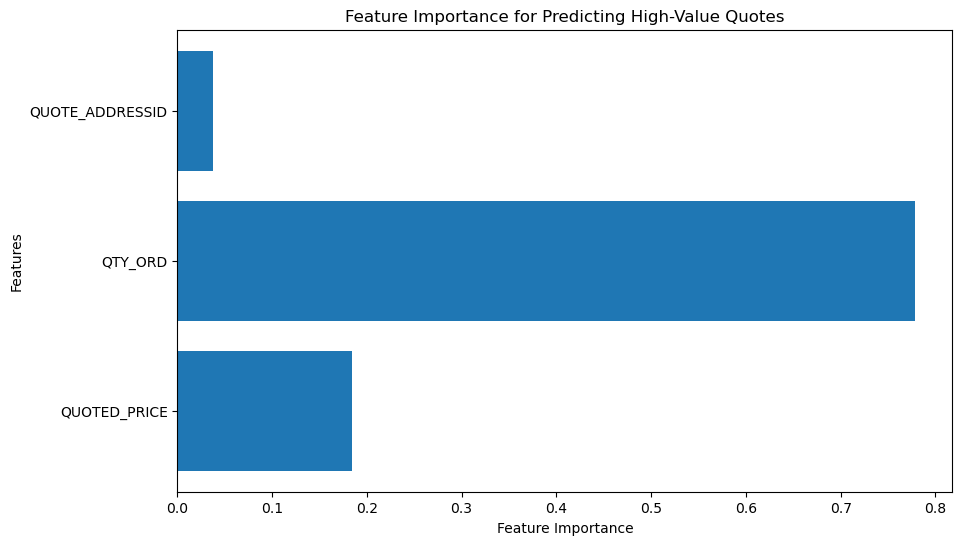

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df1[['QUOTED_PRICE', 'QTY_ORD','QUOTE_ADDRESSID']]  
y = df1['SALES_VALUE'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

feature_importance = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Predicting High-Value Quotes')
plt.show()

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df1[['QUOTED_PRICE', 'QTY_ORD', 'QUOTE_ADDRESSID','QUOTE_EXCHRATE']]  
y = df1['SALES_VALUE'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

predicted_sales_values = model.predict(X)

high_value_threshold = 10000  
high_value_quotes = df1[predicted_sales_values >= high_value_threshold]

print("High-value quotes and their predicted values:")
print(high_value_quotes)
print(predicted_sales_values[predicted_sales_values >= high_value_threshold])

High-value quotes and their predicted values:
Empty DataFrame
Columns: [QUOTATIONID, ITEMNO, QTY_REQ, QTY_QUOTED, QTY_ORD, QUOTED_PRICE, DISCOUNT, QUOTE_ADDRESSID, BUYER_ADDRESSID, QUOTE_RECVD_DATE, QUOTE_EXCHRATE, CREATE_DATE, DOC_TYPE_Order, DOC_TYPE_OrderResponse, DOC_TYPE_POC, DOC_TYPE_Quotation, DOC_TYPE_Quote, DOC_TYPE_RequestForQuote, CURR_CODE_AED, CURR_CODE_BRL, CURR_CODE_DKK, CURR_CODE_EUR, CURR_CODE_GBP, CURR_CODE_JPY, CURR_CODE_NOK, CURR_CODE_SGD, CURR_CODE_USD, VESSEL_OWNER_"K" LINE LNG SHIPPING (UK) LTD., VESSEL_OWNER_ARAB MARITIME PETROLEUM TRANSPORT CO. (AMPTC), VESSEL_OWNER_Anglo-Eastern Ship Management Ltd., VESSEL_OWNER_Bergshav Management AS, VESSEL_OWNER_Bernhard Schulte Shipmanagement (Hong Kong) Limite, VESSEL_OWNER_Bernhard Schulte Shipmanagement (India) Pvt. Limit, VESSEL_OWNER_Bernhard Schulte Shipmanagement (Isle of Man) Ltd , VESSEL_OWNER_Bernhard Schulte Shipmanagement (Singapore) Pte Lt, VESSEL_OWNER_Besiktas Marine, VESSEL_OWNER_CHELLARAM SHIPPING LTD, VE

### OUTLIER REMOVAL USING SPECIFIC FEATURES

### BUILDING MODEL

## EXPORT DATA

### PICKLE FILE

### JSON FILE

### Questions to answer

* When to expect next quote
* Quote Acceptance Probability